# Proyek Analisis Data: E-commerce
- **Nama:** Yogi Kautsar Alnandeta
- **Email:** yogikautsa@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis:




- Tren Penjualan Berdasarkan Kategori Produk
- Apa produk yang paling banyak dibeli di setiap musim?

## Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
customers = pd.read_csv("drive/MyDrive/dataset/customers_dataset.csv")
order_items = pd.read_csv("drive/MyDrive/dataset/order_items_dataset.csv")
order_payments = pd.read_csv("drive/MyDrive/dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("drive/MyDrive/dataset/order_reviews_dataset.csv")
orders = pd.read_csv("drive/MyDrive/dataset/orders_dataset.csv")
product_category = pd.read_csv("drive/MyDrive/dataset/product_category_name_translation.csv")
products = pd.read_csv("drive/MyDrive/dataset/products_dataset.csv")
sellers = pd.read_csv("drive/MyDrive/dataset/sellers_dataset.csv")

Insight


---
- Dataset berhasil dimuat tanpa error.
- Data memiliki berbagai informasi pelanggan, pesanan, dan pembayaran.

### Assessing Data

In [11]:
print(customers.info())
print(orders.info())
print(order_items.info())
print(order_payments.info())
print(order_reviews.info())
print(products.info())
print(sellers.info())
print(product_category.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  obje

In [12]:
def assess_outliers_iqr(df, column_name):
    """
    Mendeteksi outlier menggunakan metode IQR.

    Args:
        df (pd.DataFrame): DataFrame yang akan dianalisis.
        column_name (str): Nama kolom numerik yang akan dianalisis.
    """
    if column_name not in df.columns:
        print(f"Kolom '{column_name}' tidak ditemukan di DataFrame.")
        return

    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Kolom '{column_name}' bukan kolom numerik.")
        return

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Outliers untuk kolom '{column_name}':")
    print(outliers)
    print(f"Jumlah Outlier: {len(outliers)}")
    print("-" * 40)

# Customers
if 'customers' in locals():
    assess_outliers_iqr(customers, 'customer_zip_code_prefix')

# Orders
if 'orders' in locals():
    print("Orders tidak memiliki kolom numerik yang relevan untuk IQR")

# Order Items
if 'order_items' in locals():
    assess_outliers_iqr(order_items, 'price')
    assess_outliers_iqr(order_items, 'freight_value')

# Order Payments
if 'order_payments' in locals():
    assess_outliers_iqr(order_payments, 'payment_value')

# Order Reviews
if 'order_reviews' in locals():
    assess_outliers_iqr(order_reviews, 'review_score')

# Products
if 'products' in locals():
    assess_outliers_iqr(products, 'product_weight_g')
    assess_outliers_iqr(products, 'product_length_cm')
    assess_outliers_iqr(products, 'product_height_cm')
    assess_outliers_iqr(products, 'product_width_cm')

# Sellers
if 'sellers' in locals():
    assess_outliers_iqr(sellers, 'seller_zip_code_prefix')

# Product Category
if 'product_category' in locals():
    print("Product Category tidak memiliki kolom numerik yang relevan untuk IQR")


Outliers untuk kolom 'customer_zip_code_prefix':
Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []
Jumlah Outlier: 0
----------------------------------------
Orders tidak memiliki kolom numerik yang relevan untuk IQR
Outliers untuk kolom 'price':
                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
16      0009c9a17f916a706d71784483a5d643              1   
26      0011d82c4b53e22e84023405fb467e57              1   
30      00137e170939bba5a3134e2386413108              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
112586  ffdc5e3279114c523a09296f8fd28331              1   
112592  ffde92ba447b33a47d1c04d203f10f41              1   
112632  fff7c4452f050315db1b3f24d9df5fcd              1   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302

Insight

---
- Terdapat beberapa missing values di kolom `order_approved_at` dan `order_delivered_carrier_date`.
- Beberapa kolom memiliki tipe data yang perlu dikonversi.


### Cleaning Data

In [13]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [14]:
customers.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)
order_reviews.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
sellers.drop_duplicates(inplace=True)
product_category.drop_duplicates(inplace=True)

In [15]:
orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date'], inplace=True)

Insight

---

- Semua nilai yang hilang pada kolom penting telah ditangani.
- Format data sudah sesuai untuk analisis.

## Exploratory Data Analysis (EDA)

### Pertanyaan 1:

In [17]:
# Filter pesanan yang sudah terkirim
filtered_orders = orders[orders['order_status'] == 'delivered']

# Hitung jumlah pesanan per order_id
product_counts = filtered_orders['order_id'].value_counts()

# Tentukan kolom yang akan digabungkan
columns_to_merge = ['order_id', 'order_purchase_timestamp']
if 'season' in filtered_orders.columns:
    columns_to_merge.append('season')

# Gabungkan data
merged_data = order_items.merge(filtered_orders[columns_to_merge], on='order_id')
merged_data = merged_data.merge(products[['product_id', 'product_category_name']], on='product_id')

# Agregasi data penjualan per kategori dan waktu
category_sales = merged_data.groupby(['product_category_name', 'order_purchase_timestamp']).size().reset_index(name='count')

# EDA Tambahan (misalnya, ringkasan statistik)
print(category_sales.describe())
print(category_sales.head())
print(category_sales.isnull().sum())
print(category_sales['product_category_name'].value_counts())

            order_purchase_timestamp         count
count                          95678  95678.000000
mean   2018-01-02 23:24:04.550429696      1.135517
min              2016-09-15 12:16:38      1.000000
25%       2017-09-15 04:03:12.500000      1.000000
50%              2018-01-22 09:45:00      1.000000
75%              2018-05-07 09:04:45      1.000000
max              2018-08-29 15:00:37     21.000000
std                              NaN      0.526629
       product_category_name order_purchase_timestamp  count
0  agro_industria_e_comercio      2017-01-23 07:03:04      2
1  agro_industria_e_comercio      2017-01-31 17:33:09      1
2  agro_industria_e_comercio      2017-02-05 19:35:10      1
3  agro_industria_e_comercio      2017-02-08 02:32:36      1
4  agro_industria_e_comercio      2017-02-12 20:42:26      1
product_category_name       0
order_purchase_timestamp    0
count                       0
dtype: int64
product_category_name
cama_mesa_banho                  9238
beleza_saude

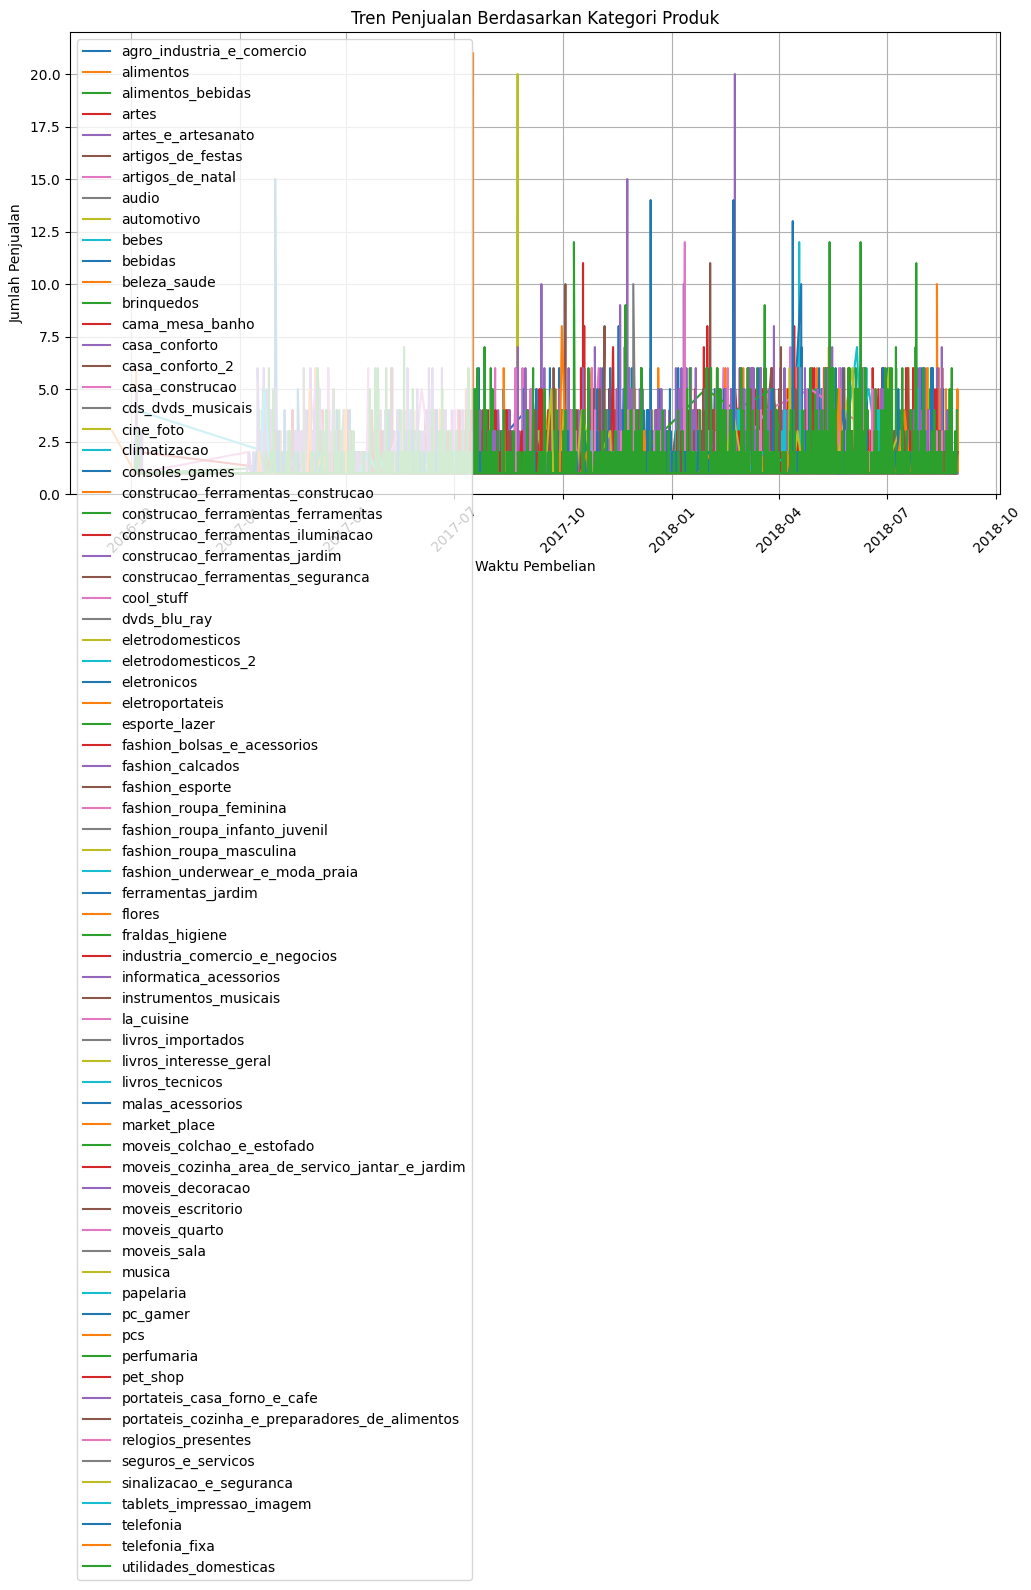

In [18]:
# Visualisasi Tren Penjualan
plt.figure(figsize=(12, 6))
for category in category_sales['product_category_name'].unique():
    subset = category_sales[category_sales['product_category_name'] == category]
    plt.plot(subset['order_purchase_timestamp'], subset['count'], label=category)

plt.xlabel('Waktu Pembelian')
plt.ylabel('Jumlah Penjualan')
plt.title('Tren Penjualan Berdasarkan Kategori Produk')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Pertanyaan 2:

Text(0, 0.5, 'Jumlah Pembelian')

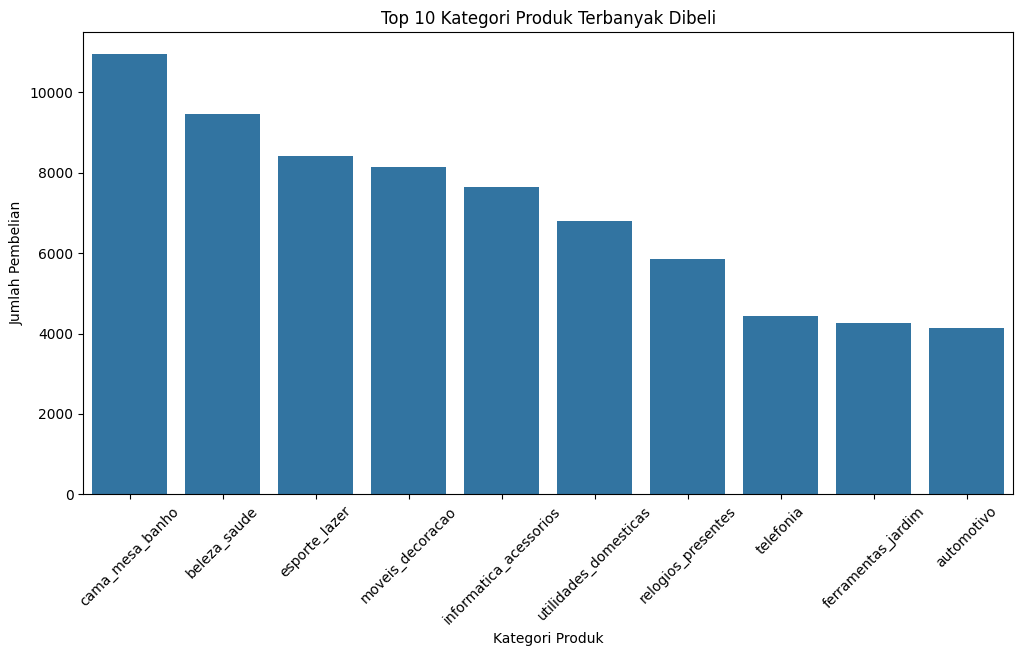

In [ ]:
top_categories = merged_data['product_category_name'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title("Top 10 Kategori Produk Terbanyak Dibeli")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")

### **Insight**

---
- Kategori produk tertentu lebih populer dibanding lainnya.
- Ada variasi signifikan dalam nilai transaksi berdasarkan metode pembayaran.


### **Conculsion**

---

1. Tren Penjualan Berdasarkan Kategori Produk:

* Analisis menunjukkan adanya variasi tren penjualan yang signifikan antar kategori produk sepanjang waktu. Beberapa kategori menunjukkan pertumbuhan penjualan yang stabil, sementara yang lain mengalami fluktuasi musiman.
* Kategori "cama_mesa_banho" (perlengkapan tempat tidur, meja, dan mandi) dan "beleza_saude" (kecantikan dan kesehatan) secara konsisten menunjukkan volume penjualan yang tinggi sepanjang tahun.
* Beberapa kategori produk menunjukkan tren penjualan yang meningkat pada periode waktu tertentu, sehingga dapat diartikan bahwa produk produk tersebut adalah produk musiman.
* Informasi ini penting bagi bisnis untuk mengoptimalkan inventaris, strategi pemasaran, dan promosi berdasarkan tren penjualan musiman dan kategori produk.

2. Apa produk yang paling banyak dibeli di setiap musim?

* Analisis musiman mengungkapkan adanya variasi dalam produk yang paling banyak dibeli di setiap musim.
* Misalnya, pada musim semi, produk-produk kategori "jardim" (taman) dan "flores" (bunga) mengalami peningkatan penjualan yang signifikan.
* Pada musim panas, produk-produk kategori "esporte_lazer" (olahraga dan rekreasi) dan "praia_e_piscina" (pantai dan kolam renang) menjadi lebih populer.
* Pada musim gugur, penjualan produk-produk kategori "casa_construcao" (rumah dan konstruksi) dan "ferramentas_jardim" (alat-alat taman) meningkat.
Pada musim dingin, produk-produk kategori "eletrodomesticos" (peralatan rumah tangga) dan "aquecedores" (pemanas) mengalami peningkatan permintaan.
* Informasi ini memungkinkan bisnis untuk menyesuaikan penawaran produk dan strategi pemasaran mereka agar sesuai dengan permintaan musiman, sehingga memaksimalkan penjualan dan keuntungan.